## <center>Image Processing Using OpenCV</center>


### OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It provides a comprehensive set of tools for image and video processing, computer vision tasks, and machine learning algorithms. OpenCV is written in C++ and has bindings for various programming languages, including Python.

Key features of OpenCV include:

1. **Image Processing:** OpenCV offers a wide range of image processing functions, including basic operations like filtering, thresholding, morphological operations, and more.

2. **Computer Vision Algorithms:** It provides implementations of various computer vision algorithms, such as feature detection, object recognition, image stitching, camera calibration, and motion analysis.

3. **Machine Learning:** OpenCV includes machine learning modules that support various machine learning techniques, including clustering, classification, and regression. It integrates with other popular machine learning libraries like scikit-learn.

4. **Real-time Computer Vision:** OpenCV is designed for real-time applications and supports real-time image and video processing. It includes tools for capturing and processing video streams from cameras.

5. **Cross-Platform:** OpenCV is cross-platform and runs on Windows, Linux, and macOS. This makes it suitable for a wide range of applications on different operating systems.

6. **Community and Documentation:** OpenCV has a large and active community, which contributes to its development and improvement. It also has extensive documentation and resources, making it accessible to developers and researchers.

7. **Open Source:** Being an open-source library, OpenCV allows users to view, modify, and distribute the source code. This encourages collaboration and innovation within the computer vision community.

* OpenCV is widely used in various fields, including computer vision research, robotics, image and video processing applications, augmented reality, and more. It provides a powerful and flexible platform for developers working on projects that involve visual data.

In [5]:
# pip install opencv-python

In [6]:
# Import numpy
import numpy as np
import cv2
print(cv2.__version__)

4.10.0


### Loading Images

In [2]:
# Load an image using 'imread' specifying the path to image
image = cv2.imread('./images/coffee.jpg')

In [3]:
image

array([[[ 75, 171, 224],
        [ 69, 158, 209],
        [ 29, 105, 154],
        ...,
        [ 14,  24,  42],
        [ 12,  23,  43],
        [ 12,  23,  43]],

       [[ 68, 162, 215],
        [ 58, 147, 198],
        [ 17,  90, 140],
        ...,
        [ 14,  24,  42],
        [ 12,  23,  43],
        [ 12,  23,  43]],

       [[ 66, 158, 211],
        [ 55, 139, 191],
        [  8,  79, 129],
        ...,
        [ 14,  23,  43],
        [ 12,  23,  43],
        [ 12,  23,  43]],

       ...,

       [[  3,  17,  45],
        [  7,  21,  49],
        [ 19,  33,  61],
        ...,
        [  0,   7,  21],
        [  0,   3,  19],
        [  1,  14,  30]],

       [[ 17,  32,  58],
        [ 19,  34,  60],
        [ 15,  30,  56],
        ...,
        [ 13,  24,  38],
        [ 20,  33,  49],
        [ 29,  43,  61]],

       [[ 17,  32,  58],
        [ 16,  31,  57],
        [  2,  17,  43],
        ...,
        [  0,  11,  25],
        [ 17,  30,  46],
        [ 26,  40,  58]]

### Display images

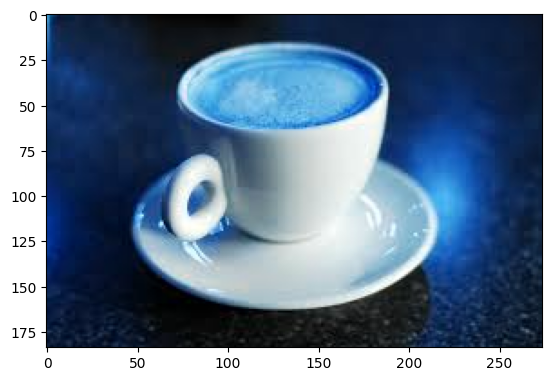

In [4]:
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(image)
plt.show()

### opencv considers RGB color coding as BGR. So we need to change it to RGB color coding.

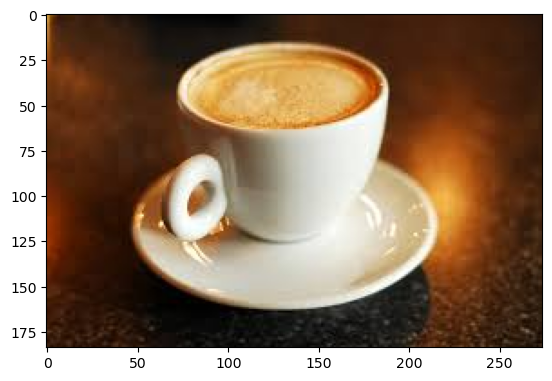

In [4]:
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [52]:
# cv2.imshow("Coffee_Image", image)

# # waitKey(0) : shows image for 0 miliseconds when user presses any key.
# # if give some miliseconds like : 2000 it will go away after it automatically
# cv2.waitKey(0)  

# # when user presses any key it destroy all windows.
# cv2.destroyAllWindows()   

In [5]:
image.shape

(184, 274, 3)

In [6]:
# Use cv2.split to get each color space separately
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(184, 274)
(184, 274)
(184, 274)


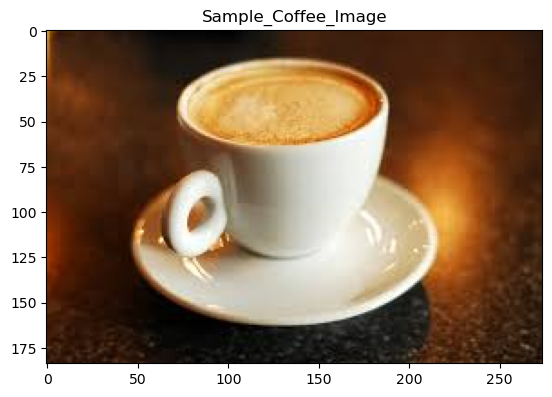

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Sample_Coffee_Image")
plt.show()

### Save the image

In [8]:
#cv2.imwrite('coffee_img.jpg', image)

### Grayscale images
* Convert a color image to grayscale
* change in dimensions between grayscale and color images

In [9]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

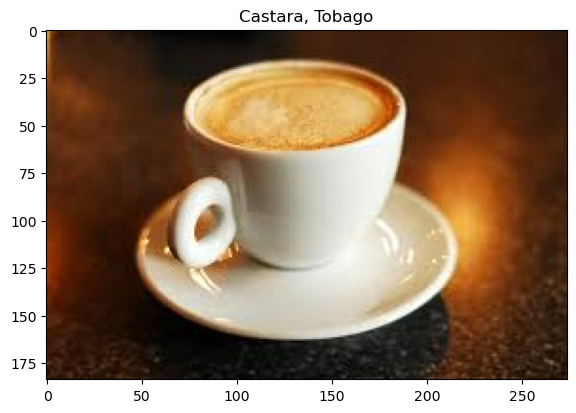

In [10]:
imshow("Castara, Tobago", image)

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow("Converted to Grayscale", gray_image)

In [12]:
### shape of colored image
image.shape

(184, 274, 3)

In [13]:
### shape of gray image
gray_image.shape

(184, 274)

### Different color spaces

In [14]:
# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [15]:
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(184, 274)
(184, 274)
(184, 274)


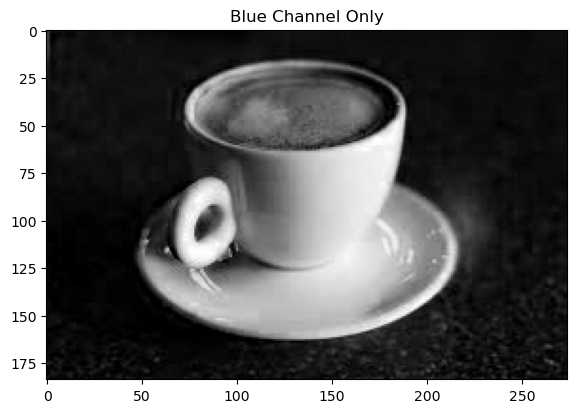

In [16]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
imshow("Blue Channel Only", B)

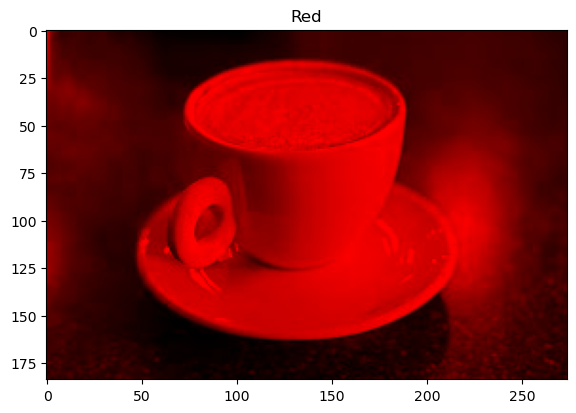

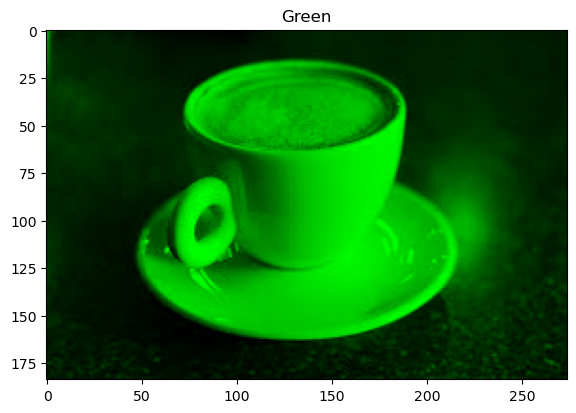

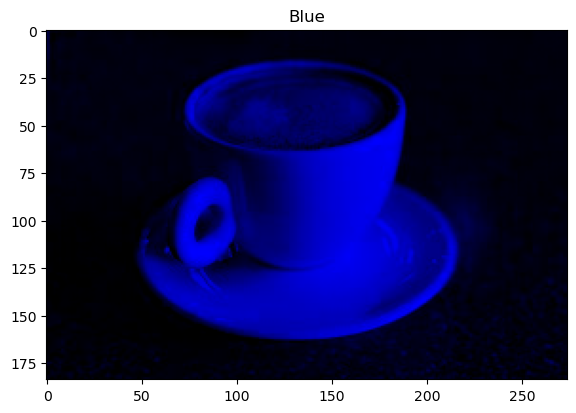

In [17]:
# create a matrix of zeros with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8")

imshow("Red", cv2.merge([zeros, zeros, R]))
imshow("Green", cv2.merge([zeros, G, zeros]))
imshow("Blue", cv2.merge([B, zeros, zeros]))

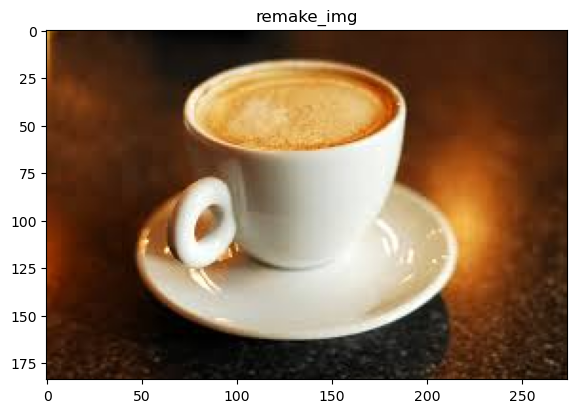

In [18]:
### re-make the same image
remake_img = cv2.merge([B, G, R]) 
imshow("remake_img", remake_img) 

In [19]:
# amplify any color
merged = cv2.merge([B+20, G, R])
imshow("Blue Boost", merged)

In [20]:
# # amplify any color
# merged = cv2.merge([B+10, G+2, R-10])
# imshow("Blue Boost", merged)

### Translation with images
* shifts the position of an image. (left or right).

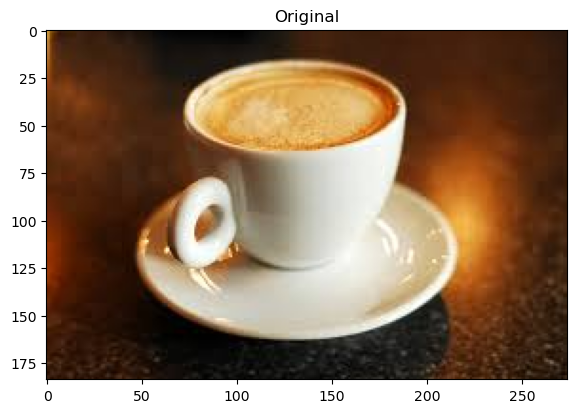

In [21]:
imshow("Original", image)

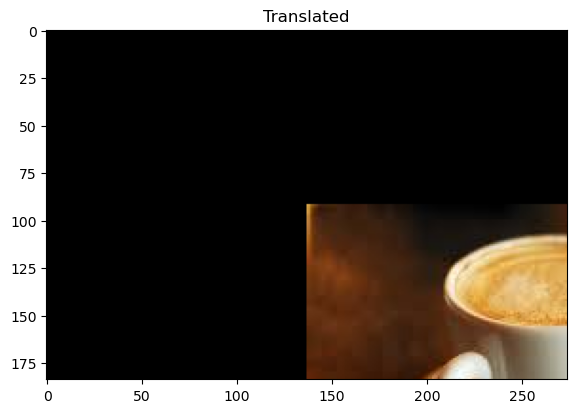

In [22]:

height, width = image.shape[:2]

# shift it by half of the height and width
quarter_height, quarter_width = height/2, width/2

shift = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, shift, (width, height))
imshow("Translated", img_translation)

In [23]:
#shift

### Rotation

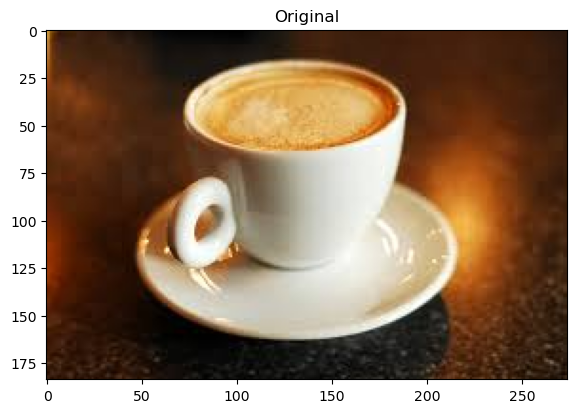

In [24]:
imshow("Original", image)

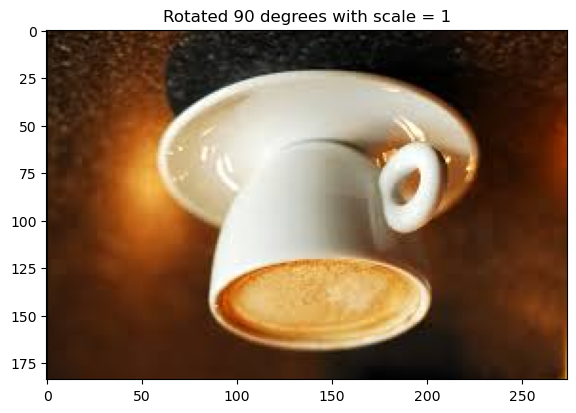

In [25]:
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 180, 1)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)

### Transpose

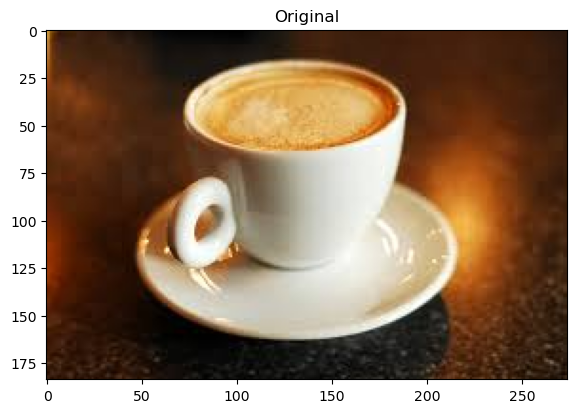

In [26]:
imshow("Original", image)

In [27]:
rotated_image = cv2.transpose(image)
imshow("Rotated using Transpose", rotated_image)

In [28]:
original_image = cv2.transpose(rotated_image)
imshow("Rotated using Transpose", original_image)

### Resize image

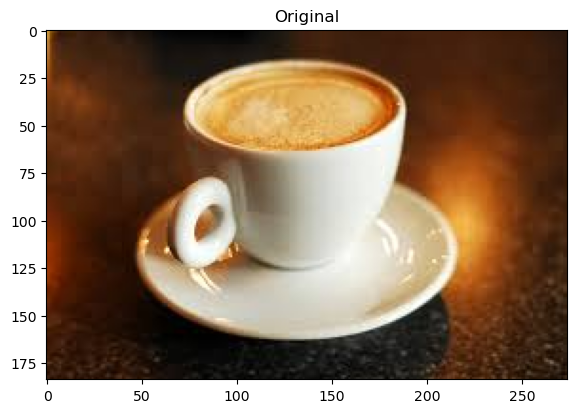

In [29]:
imshow("Original", image)

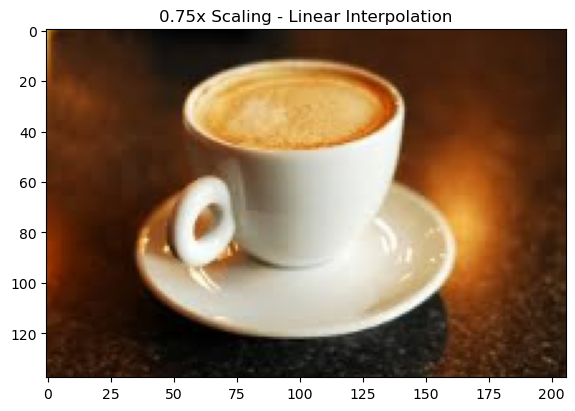

In [30]:
# make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
imshow("0.75x Scaling - Linear Interpolation", image_scaled)

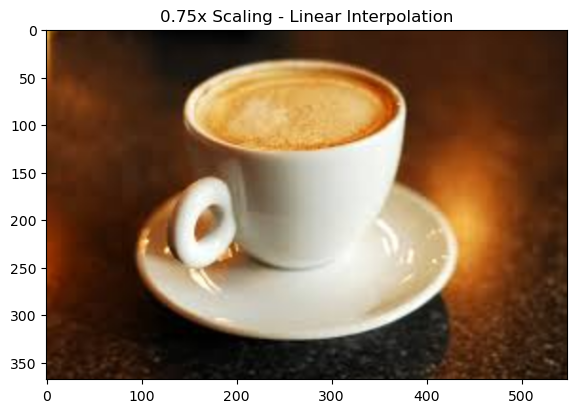

In [31]:
image_scaled = cv2.resize(image, None, fx=2, fy=2)
imshow("0.75x Scaling - Linear Interpolation", image_scaled)

### Crop image

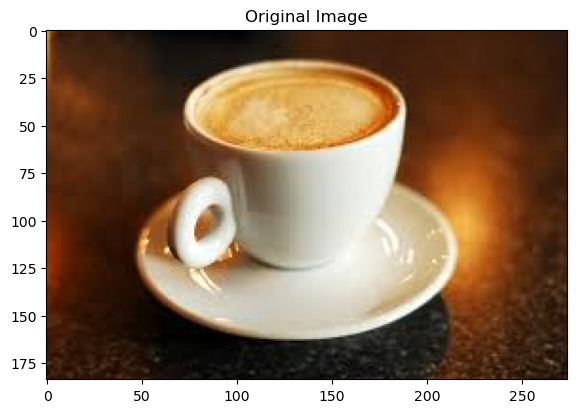

In [32]:
imshow("Original Image", image)

In [33]:
# Get our image dimensions
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
# using 0.25 to get the x,y position that is 1/4 down from the top left (0,0)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

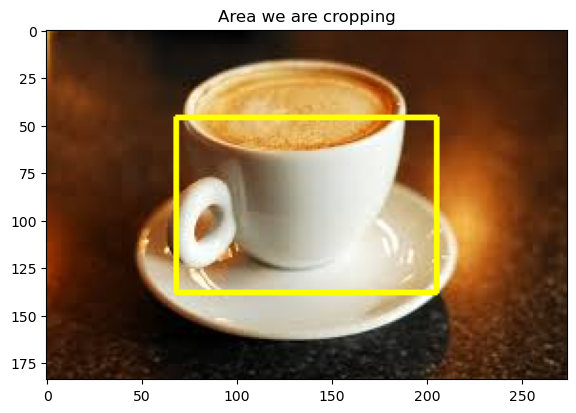

In [34]:
copy = image.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 2)

imshow("Area we are cropping", copy)

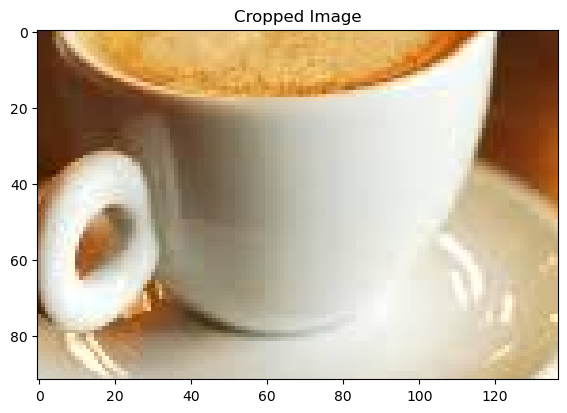

In [35]:
cropped = image[start_row:end_row , start_col:end_col]

imshow("Cropped Image", cropped) 

### Blurred image

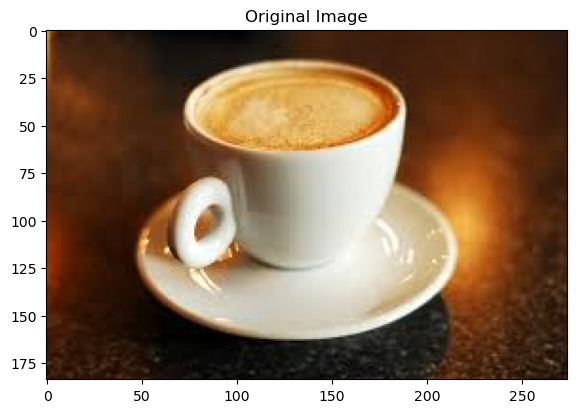

In [38]:
imshow("Original Image", image)

In [39]:
blur = cv2.blur(image, (7,7))
imshow('Averaging', blur)

### Sharpening Images

In [47]:
# Create our shapening kernel, remember it must sum to one 
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)

In [57]:
# import cv2
# import os

# # Folder path
# folder_path = r'C:\Users\Vikas Srivastava\Desktop\ExcelR\Deep Learning & AI\Day7\Part 1\images'

# # Check if the folder exists
# if not os.path.exists(folder_path):
#     print(f"The specified folder path '{folder_path}' does not exist.")
#     exit()

# # Get a list of all files in the folder
# image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# # Read and import each image
# for image_file in image_files:
#     # Construct the full path to the image file
#     image_path = os.path.join(folder_path, image_file)
    
#     # Read the image using OpenCV
#     image = cv2.imread(image_path)

#     # Check if the image is successfully loaded
#     if image is None:
#         print(f"Error: Unable to read the image file '{image_file}'.")
#         continue

#     # Display or process the image as needed
#     # For example, you can display the image using cv2.imshow() or perform further analysis
    
#     # Example: Display image
#     cv2.imshow(f"Image: {image_file}", image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
